<a href="https://colab.research.google.com/github/Siri-isha/CyberSecurity/blob/main/LogAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Log Analysis

Define the regex pattern for the log entries.

In [4]:
import re

#the regex pattern for the log entries
regex_pattern = r'(?P<ip_address>\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) - - \[(?P<timestamp>\d{1,2}/\w{3}/\d{4}:\d{2}:\d{2}:\d{2} \+\d{4})\] "(?P<request_method>\w+) (?P<request_path>/\S+) (?P<http_version>HTTP/\d\.\d)" (?P<status_code>\d{3}) (?P<response_size>\d+)'


Parse the log file and print only the first 5 entries.

In [5]:
#function to read the log file from the path and parse it

def read_log_file(file_path):
    log_entries = []
    with open('/content/sample_data/log_files.txt', 'r') as file:
        for line in file:
            match = re.match(regex_pattern, line)
            if match:
                log_entry = {
                    'ip_address': match.group('ip_address'),
                    'timestamp': match.group('timestamp'),
                    'request_method': match.group('request_method'),
                    'request_path': match.group('request_path'),
                    'http_version': match.group('http_version'),
                    'status_code': match.group('status_code'),
                    'response_size': match.group('response_size')
                }
                log_entries.append(log_entry)
    return log_entries

file_path = '/content/sample_data/log_files.txt'
log_entries = read_log_file(file_path)

#print the first 5 entries
for i in range(5):
  print(log_entries[i])

{'ip_address': '192.168.1.208', 'timestamp': '12/Dec/2023:04:52:50 +0000', 'request_method': 'DELETE', 'request_path': '/contact.html', 'http_version': 'HTTP/1.1', 'status_code': '404', 'response_size': '34982'}
{'ip_address': '192.168.1.171', 'timestamp': '15/Feb/2023:21:04:10 +0000', 'request_method': 'DELETE', 'request_path': '/about.html', 'http_version': 'HTTP/1.1', 'status_code': '500', 'response_size': '18515'}
{'ip_address': '192.168.1.67', 'timestamp': '12/Jun/2022:11:39:58 +0000', 'request_method': 'DELETE', 'request_path': '/contact.html', 'http_version': 'HTTP/1.1', 'status_code': '500', 'response_size': '86103'}
{'ip_address': '192.168.1.34', 'timestamp': '4/Jan/2023:00:12:33 +0000', 'request_method': 'DELETE', 'request_path': '/index.html', 'http_version': 'HTTP/1.1', 'status_code': '404', 'response_size': '55833'}
{'ip_address': '192.168.1.187', 'timestamp': '9/May/2022:16:29:32 +0000', 'request_method': 'PUT', 'request_path': '/about.html', 'http_version': 'HTTP/1.1', '

Import defaultdict from collections module to handle counting of status codes

In [6]:
from collections import defaultdict

#initialize the variable with defaultdict object
status_code_counts = defaultdict(int)

#Count the number of entries for various status_codes and save in a dictionary
for entry in log_entries:
  status_code_counts[entry['status_code']] += 1

print(status_code_counts)

defaultdict(<class 'int'>, {'404': 326, '500': 359, '200': 315})


Define a function that reads log entries from the specified file and extracts the HTTP status code from each entry.

In [7]:
#function that extracts and returns HTTP status codes for the given log entries input
def read_status_codes(log_entries):
    status_codes = defaultdict(int)

    for entry in log_entries:
        status_codes[entry['status_code']] += 1

    return status_codes

file_path = '/content/sample_data/log_files.txt'
log_entries = read_log_file(file_path)
read_status_codes(log_entries)

defaultdict(int, {'404': 326, '500': 359, '200': 315})

Define a function to count the occurrences of each status code

In [8]:
def count_status_codes(log_entries):
    status_codes = defaultdict(int)

    for entry in log_entries:
        status_codes[entry['status_code']] += 1
    print(status_codes)

file_path = '/content/sample_data/log_files.txt'
log_entries = read_log_file(file_path)
count_status_codes(log_entries)


defaultdict(<class 'int'>, {'404': 326, '500': 359, '200': 315})


Plot the above counts in a bar chart

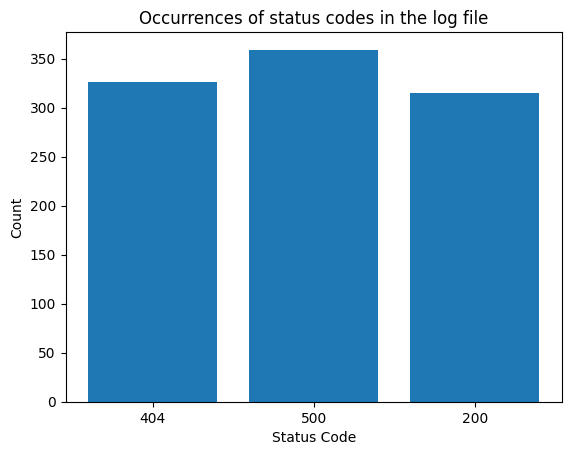

In [9]:
import matplotlib.pyplot as plt

status_codes = list(status_code_counts.keys())
counts = list(status_code_counts.values())

plt.bar(status_codes, counts)
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.title('Occurrences of status codes in the log file')
plt.show()

Define a function to get the percentage of successful requests

In [14]:
#function to calculate the percentage of successful requests
def percentage_successful_requests(log_entries):
    #Number of entries will give total number of requests
    total_requests = len(log_entries)
    #Status code 200 value from the dictionary gives total number of successful requests
    successful_requests = status_code_counts['200']
    #Calculate the percentage
    percentage = (successful_requests / total_requests) * 100
    return percentage

#Call the function with input of log entries
file_path = '/content/sample_data/log_files.txt'
log_entries = read_log_file(file_path)
print("Percentage of successful requests:", percentage_successful_requests(log_entries), "%")


Percentage of successful requests: 31.5 %


Define a function to get top 3 URLs and their respective count

In [22]:
def top_3_urls(log_entries):
    url_counts = defaultdict(int)
    for entry in log_entries:
        url_counts[entry['request_path']] += 1
        # Sort the URL counts in descending order
        sorted_urls = sorted(url_counts.items(), key=lambda x: x[1], reverse=True)
    print("Top 3 URLs and their respective count:")
    for i in range(3):
        print(sorted_urls[i])


file_path = '/content/sample_data/log_files.txt'
log_entries = read_log_file(file_path)
top_3_urls(log_entries)

Top 3 URLs and their respective count:
('/services.html', 273)
('/about.html', 245)
('/index.html', 245)


Define a function to get the IP address and the number of requests made by the most active client.

In [32]:
#In the logs, sort by timestamp, get the latest entry and extract it's IP address and then count it's number of occurrences

def most_active_client(log_entries):
    #sort the entries by timestamp
    sorted_entries = sorted(log_entries, key=lambda x: x['timestamp'], reverse=True)
    for i in range(10):
        print(sorted_entries[i])
    print("(..........)")
    #get the latest entry
    latest_entry = sorted_entries[0]
    #IP address of latest entry
    ip_address = latest_entry['ip_address']
    #count the number of requests made by the most active client
    request_count = 0
    for entry in log_entries:
        if entry['ip_address'] == ip_address:
            request_count += 1

    print(f"IP address and the number of requests made by the most active client: {ip_address}, {request_count}, {latest_entry['timestamp']}")


file_path = '/content/sample_data/log_files.txt'
log_entries = read_log_file(file_path)
for i in range(10):
  print(log_entries[i])
print(".....................")
most_active_client(log_entries)

{'ip_address': '192.168.1.208', 'timestamp': '12/Dec/2023:04:52:50 +0000', 'request_method': 'DELETE', 'request_path': '/contact.html', 'http_version': 'HTTP/1.1', 'status_code': '404', 'response_size': '34982'}
{'ip_address': '192.168.1.171', 'timestamp': '15/Feb/2023:21:04:10 +0000', 'request_method': 'DELETE', 'request_path': '/about.html', 'http_version': 'HTTP/1.1', 'status_code': '500', 'response_size': '18515'}
{'ip_address': '192.168.1.67', 'timestamp': '12/Jun/2022:11:39:58 +0000', 'request_method': 'DELETE', 'request_path': '/contact.html', 'http_version': 'HTTP/1.1', 'status_code': '500', 'response_size': '86103'}
{'ip_address': '192.168.1.34', 'timestamp': '4/Jan/2023:00:12:33 +0000', 'request_method': 'DELETE', 'request_path': '/index.html', 'http_version': 'HTTP/1.1', 'status_code': '404', 'response_size': '55833'}
{'ip_address': '192.168.1.187', 'timestamp': '9/May/2022:16:29:32 +0000', 'request_method': 'PUT', 'request_path': '/about.html', 'http_version': 'HTTP/1.1', '